In [1]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import time
import random
from CNN import *

X_120_matrix
(120, 120, 3, 144)
Y_120_matrix
(144, 1)
X_180_matrix
(180, 180, 3, 60)
Y_180_matrix
(60, 1)
num_images
144
num_images
60
(96, 100, 100, 3)
(96, 9)
2.307154
0.00041159487
0.00011546761
2.5753034e-05
5.611371e-06
2.333246e-06
1.2877002e-06
8.2949447e-07
5.836271e-07
4.3213268e-07
3.3403379e-07
2.6822053e-07
2.1855011e-07
1.7881376e-07
1.5273679e-07
1.2790156e-07
1.13000404e-07
9.934103e-08
9.313222e-08
7.69893e-08
7.6989316e-08
6.457168e-08
6.7055204e-08
6.705521e-08
5.7121103e-08
5.4637578e-08
5.4637578e-08
5.3395812e-08
4.967053e-08
4.718699e-08
6.084638e-08
3.393823
0.098753184
0.0059539354
0.00037221026
0.00012089783
6.027149e-05
3.7051e-05
2.5645859e-05
1.8908757e-05


In [2]:
def load_image(path):
    img = cv2.imread(path)
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(RGB_img/255)
    return RGB_img

(1080, 1920, 3)

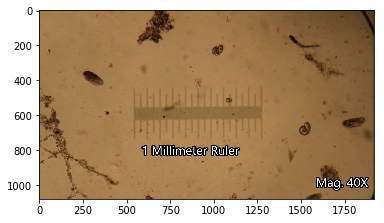

In [3]:
img = load_image("video 2/image_1887.jpg")
img.shape

In [4]:
def sliding_window(image, stepSize, windowSize):
    # slide a window across the image
    for y in range(0, image.shape[0]-windowSize[1], stepSize):
        for x in range(0, image.shape[1]-windowSize[0], stepSize):
            # yield the current window
            yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0],:])

In [14]:
coordinates_cir=[]
coordinates_rod=[]
window_size=150
for (x,y,window) in sliding_window(image=img,stepSize=20,windowSize=(window_size,window_size)):
    window = cv2.resize(window, (100,100), interpolation = cv2.INTER_CUBIC)
    sample = window.reshape([1,100,100,3])/255
    y_pred_1 = sess.run(y_pred,feed_dict={X:sample})
    window_class=0;
    if (np.amax(y_pred_1)>0.9):
        window_class = np.argmax(y_pred_1)+1
    if (window_class==2):
        print (y_pred_1)
        coordinates_cir.append([x,y,window_size,window_size])
    if (window_class==3):
        print (y_pred_1)
        coordinates_rod.append([x,y,window_size, window_size])

[[2.5660496e-31 1.1251626e-16 9.9997389e-01 3.3865712e-09 4.6331147e-17
  2.0109406e-05 0.0000000e+00 6.0319994e-06 0.0000000e+00]]
[[1.8400919e-26 2.9355547e-15 9.9999976e-01 5.3452555e-13 2.2556873e-20
  2.8205773e-07 0.0000000e+00 1.1738817e-08 0.0000000e+00]]
[[8.4875315e-17 3.9472789e-10 9.6954006e-01 3.7459760e-08 6.6023223e-13
  3.0459890e-02 0.0000000e+00 4.0617067e-08 1.4680815e-38]]
[[1.18400476e-20 3.37901880e-13 9.99673724e-01 3.33052093e-11
  1.10285594e-13 3.15664307e-04 0.00000000e+00 1.05934078e-05
  0.00000000e+00]]
[[1.3891541e-14 9.2280114e-11 9.9974746e-01 2.3979770e-11 2.2300406e-12
  2.5224028e-04 2.4446253e-33 2.8821097e-07 2.3246073e-37]]
[[1.5880770e-09 9.9426859e-07 9.9310040e-01 1.7388047e-04 8.5427979e-07
  6.6059986e-03 3.1040331e-22 1.1788702e-04 2.5163615e-29]]
[[3.2838646e-27 3.0304992e-08 9.8974681e-01 5.7333373e-06 3.5097362e-06
  9.8899482e-03 0.0000000e+00 3.5397508e-04 0.0000000e+00]]
[[2.4029839e-21 3.3878035e-08 9.4255179e-01 1.0977133e-07 1.56107

In [15]:
coordinates_cir=np.array(coordinates_cir)
coordinates_rod=np.array(coordinates_rod)

In [16]:
print(coordinates_cir.shape)
print(coordinates_rod.shape)

(10, 4)
(28, 4)


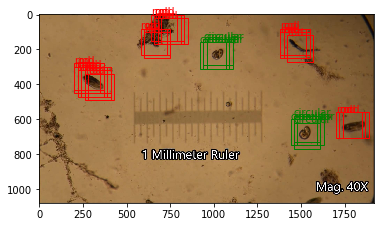

In [57]:
import matplotlib.patches as patches
fig,ax = plt.subplots(1)
ax.imshow(img)

for i in range (coordinates_rod.shape[0]):
    rect = patches.Rectangle((coordinates_rod[i,0],coordinates_rod[i,1]),coordinates_rod[i,2],
                             coordinates_rod[i,3],linewidth=1,edgecolor='r',facecolor='none',fill=False)
    ax.add_patch(rect)
    ax.annotate('rod', xy=(coordinates_rod[i,0],coordinates_rod[i,1]), xytext=(coordinates_rod[i,0],coordinates_rod[i,1]),color='r')

ax.imshow(img)


for i in range (coordinates_cir.shape[0]):
    rect = patches.Rectangle((coordinates_cir[i,0],coordinates_cir[i,1]),coordinates_cir[i,2],
                             coordinates_cir[i,3],linewidth=1,edgecolor='g',facecolor='none',fill=False)
    ax.add_patch(rect)
    ax.annotate('circular', xy=(coordinates_cir[i,0],coordinates_cir[i,1]), xytext=(coordinates_cir[i,0],coordinates_cir[i,1]),
               color='g')
ax.imshow(img)

In [32]:
coordinates_cir.shape

(10, 4)

In [29]:
def overlapped_area(window_1, window_2):
    w = window_1[1]+window_1[3]-window_2[1]
    h = window_1[0]+window_1[2]-window_2[0]
    overlapped = 0.0
    if ((w>0)&(h>0)):
        overlapped=(w*h/(window_1[2]*window_1[3]))
    return overlapped

In [61]:
def overlap_windows(coordinates_array):
    overlapped_index=[]
    i=0
    while (i<coordinates_array.shape[0]-1):
        print(i)
        if(overlapped_area(coordinates_array[i,:],coordinates_array[i+1,:]) >= 0.4 ):
            print (coordinates_array.shape)
            i-=1
            print(i)
            coordinates_array = np.delete(coordinates_array,[i+1],axis=0)
        i +=1
    return coordinates_array

In [44]:
new_coordinates_cir = overlap_windows(coordinates_cir)

0
(10, 4)
-1
0
(9, 4)
-1
0
(8, 4)
-1
0
(7, 4)
-1
0
1
(6, 4)
0
1
(5, 4)
0
1
(4, 4)
0
1
(3, 4)
0


In [63]:
new_coordinates_cir.shape
new_coordinates_rod.shape

(5, 4)

In [62]:
new_coordinates_rod = overlap_windows(coordinates_rod)

0
(28, 4)
-1
0
(27, 4)
-1
0
(26, 4)
-1
0
(25, 4)
-1
0
(24, 4)
-1
0
(23, 4)
-1
0
(22, 4)
-1
0
1
(21, 4)
0
1
(20, 4)
0
1
2
(19, 4)
1
2
(18, 4)
1
2
3
(17, 4)
2
3
(16, 4)
2
3
(15, 4)
2
3
(14, 4)
2
3
(13, 4)
2
3
(12, 4)
2
3
(11, 4)
2
3
(10, 4)
2
3
(9, 4)
2
3
(8, 4)
2
3
4
(7, 4)
3
4
(6, 4)
3


In [53]:
from PIL import Image

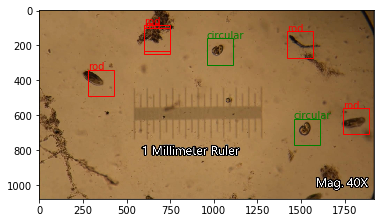

In [60]:
fig,ax = plt.subplots(1)
ax.imshow(img)

for i in range (new_coordinates_rod.shape[0]):
    rect = patches.Rectangle((new_coordinates_rod[i,0],new_coordinates_rod[i,1]),new_coordinates_rod[i,2],
                             new_coordinates_rod[i,3],linewidth=1,edgecolor='r',facecolor='none',fill=False)
    ax.add_patch(rect)
    ax.annotate('rod', xy=(new_coordinates_rod[i,0],new_coordinates_rod[i,1]), xytext=(new_coordinates_rod[i,0],new_coordinates_rod[i,1]),color='r')

ax.imshow(img)


for i in range (new_coordinates_cir.shape[0]):
    rect = patches.Rectangle((new_coordinates_cir[i,0],new_coordinates_cir[i,1]),new_coordinates_cir[i,2],
                             new_coordinates_cir[i,3],linewidth=1,edgecolor='g',facecolor='none',fill=False)
    ax.add_patch(rect)
    ax.annotate('circular', xy=(new_coordinates_cir[i,0],new_coordinates_cir[i,1]), xytext=(new_coordinates_cir[i,0],new_coordinates_cir[i,1]),
               color='g')
ax.imshow(img)
plt.savefig('testing_2.png',quality=95,format='png',dpi=288)

In [ ]:
import matplotlib.patches as patches
fig,ax = plt.subplots(1)
ax.imshow(img)
for i in range (coordinates_rod.shape[0]):
    rect = patches.Rectangle((coordinates_rod[i,0],coordinates_rod[i,1]),coordinates_rod[i,2],
                             coordinates_rod[i,3],linewidth=1,edgecolor='r',facecolor='none',fill=False)
    ax.add_patch(rect)
for i in range (coordinates_cir.shape[0]):
    rect = patches.Rectangle((coordinates_cir[i,0],coordinates_cir[i,1]),coordinates_cir[i,2],
                             coordinates_cir[i,3],linewidth=1,edgecolor='g',facecolor='none',fill=False)
    ax.add_patch(rect)
plt.show()

In [ ]:
from data import *

In [ ]:
img_new = cv2.resize(img, (100,100), interpolation = cv2.INTER_CUBIC).reshape((100,100,3,1))

In [ ]:
img_new.shape

In [ ]:
plt.imshow(img_new[:,:,:,0]/255)

In [ ]:
# loop over the image pyramid
for resized in pyramid(image, scale=1.5):
    # loop over the sliding window for each layer of the pyramid
    for (x, y, window) in sliding_window(resized, stepSize=32, windowSize=(winW, winH)):
        # if the window does not meet our desired window size, ignore it
        if window.shape[0] != winH or window.shape[1] != winW:
            continue
 
        # THIS IS WHERE YOU WOULD PROCESS YOUR WINDOW, SUCH AS APPLYING A
        # MACHINE LEARNING CLASSIFIER TO CLASSIFY THE CONTENTS OF THE
        # WINDOW
 
        # since we do not have a classifier, we'll just draw the window
        clone = resized.copy()
        cv2.rectangle(clone, (x, y), (x + winW, y + winH), (0, 255, 0), 2)
        cv2.imshow("Window", clone)
        cv2.waitKey(1)
        time.sleep(0.025)

In [ ]:
image_number = 110
train_loss_test = sess.run(cost,feed_dict={X:X_train[image_number-1:image_number,:,:,:]/255, Y_true:Y_train[image_number-1:image_number,:]})
print (train_loss_test)
plt.imshow(X_train[image_number-1,:,:,:]/255)
print(Y_train[image_number-1])
y_pred_1 = sess.run(y_pred,feed_dict={X:X_train[image_number-1:image_number,:,:,:]/255, Y_true:Y_train[image_number-1:image_number,:]})
print (y_pred_1)